In [2]:
import model as m 
import numpy as np
import matplotlib.pyplot as plt

In [8]:
para = m.ModelParams(
    age_strucure=[0,4,10,16,20,35],
    B=11e-3,
    V=np.zeros([6]),
    d=[0,0,0,0,0,9.1e-3],
    gamma=(1.0/14.0*365.0*1e-3)*np.ones([6]),
    C=np.eye(6),
    N=1
)

TypeError: __init__() got an unexpected keyword argument 'd'

In [3]:
beta=np.eye(6)*1.2

In [4]:
beta

array([[1.2, 0. , 0. , 0. , 0. , 0. ],
       [0. , 1.2, 0. , 0. , 0. , 0. ],
       [0. , 0. , 1.2, 0. , 0. , 0. ],
       [0. , 0. , 0. , 1.2, 0. , 0. ],
       [0. , 0. , 0. , 0. , 1.2, 0. ],
       [0. , 0. , 0. , 0. , 0. , 1.2]])

In [6]:
mdl = m.SIRVModel(para, lambda t: beta)

NameError: name 'para' is not defined

In [6]:
out, t = mdl.run(np.hstack([0.95*(1./6)*np.ones(6), 0.05*(1./6)*np.ones(6), np.zeros(6*2)]), 200)

AttributeError: module 'model' has no attribute 'run'

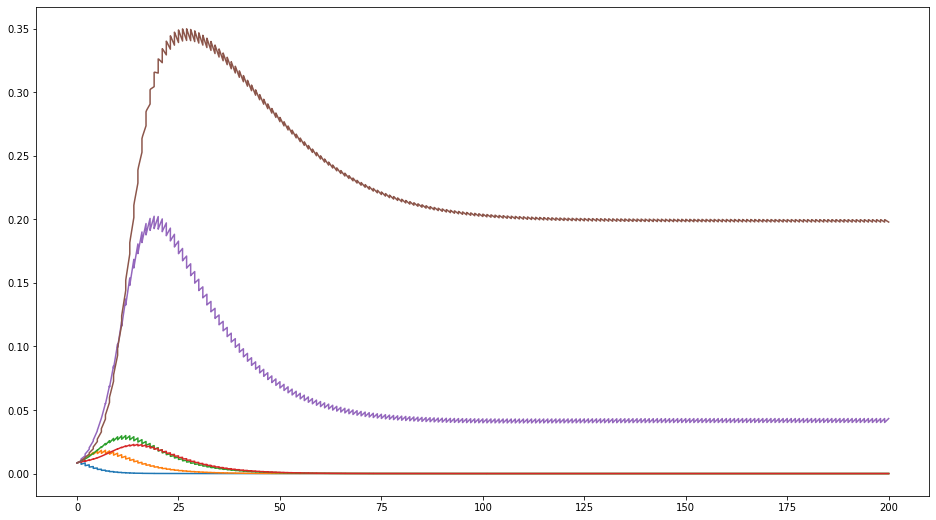

In [6]:
out[6:(6*2),:]
plt.figure(figsize=(16,9))
plt.plot(t, np.transpose(out[6:(6*2),:]))